In [3]:
!pip install numby

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import os

# Check file existence
print("File exists?", os.path.exists("loss_log.txt"))

# Read first few lines
with open("loss_log.txt") as f:
    for i, line in enumerate(f):
        if i < 10:
            print(line.strip())
        if i > 20:
            break


File exists? True
epoch,loss
1,672.612678
2,572.494365
3,514.776955
4,469.094041
5,433.457184
6,405.108063
7,381.956927
8,362.471524
9,346.266622


## Analysis of Training Loss Curve

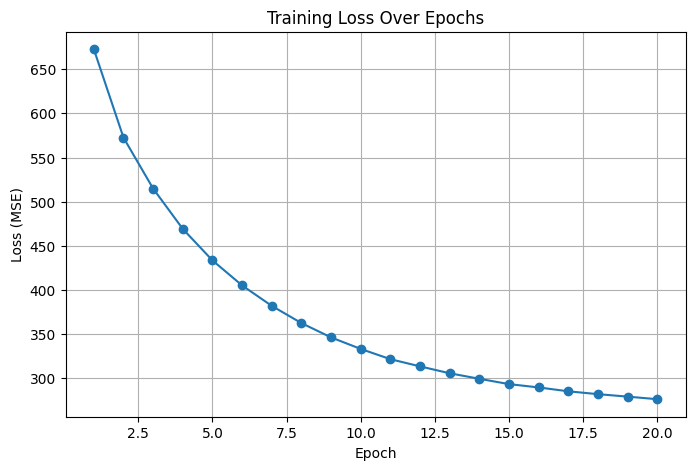

In [12]:
losses = []
with open("loss_log.txt") as f:
    next(f)  # skip header
    for line in f:
        epoch, loss = line.strip().split(",")
        losses.append((int(epoch), float(loss)))

import numpy as np
import matplotlib.pyplot as plt

losses = np.array(losses)

plt.figure(figsize=(8,5))
plt.plot(losses[:,0], losses[:,1], marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()


## Visual comparison of Z vs Z_reconstructed

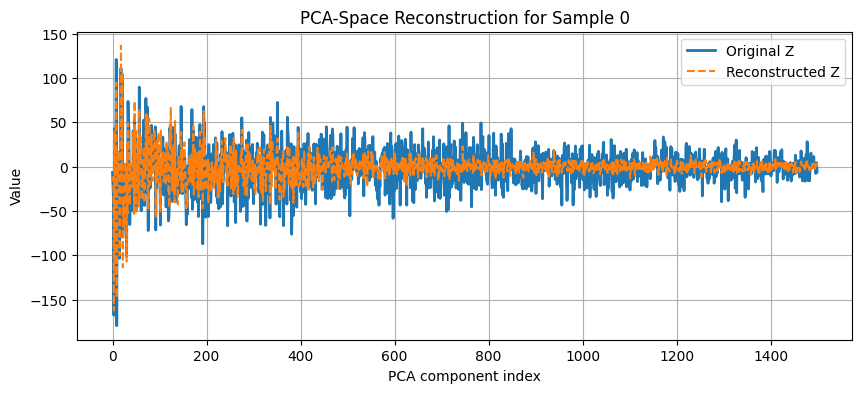

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load original and reconstructed Z
Z = np.load("/mnt/upschrimpf2/scratch/mahdipou/nsd/pca_results/pca_encoded.npy")
Z_recon = np.load("Z_reconstructed_mlp.npy")

# Choose one example to visualize
sample_idx = 0  # you can change this to see others

plt.figure(figsize=(10,4))
plt.plot(Z[sample_idx], label="Original Z", linewidth=2)
plt.plot(Z_recon[sample_idx], label="Reconstructed Z", linestyle='dashed')
plt.title(f"PCA-Space Reconstruction for Sample {sample_idx}")
plt.xlabel("PCA component index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 50.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 39.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 KB 10.2 MB/s eta 0:00:00


MSE between original and reconstructed brain signal (sample 0): 2.0057


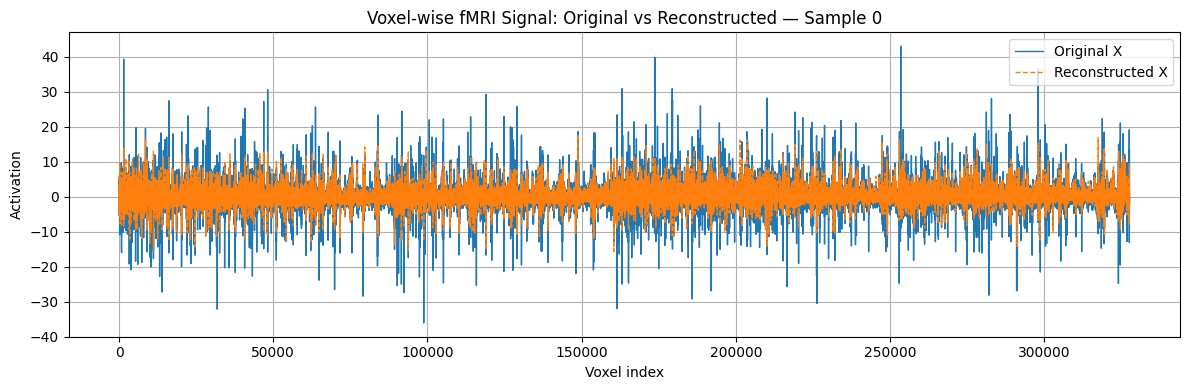

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Use memory-mapped loading (DO NOT load full file in memory)
X = np.load("/mnt/upschrimpf2/scratch/mahdipou/nsd/concatenated_beta_matrix.npy", mmap_mode="r")
X_recon = np.load("X_reconstructed_mlp.npy")

# Just take one sample
sample_idx = 0
sample_X = X[sample_idx]
sample_recon = X_recon[sample_idx]

# Compute MSE
mse = mean_squared_error(sample_X, sample_recon)
print(f"MSE between original and reconstructed brain signal (sample {sample_idx}): {mse:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(sample_X, label="Original X", linewidth=1)
plt.plot(sample_recon, label="Reconstructed X", linestyle='--', linewidth=1)
plt.title(f"Voxel-wise fMRI Signal: Original vs Reconstructed — Sample {sample_idx}")
plt.xlabel("Voxel index")
plt.ylabel("Activation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


MSE between original and reconstructed brain signal (sample 0): 2.0057


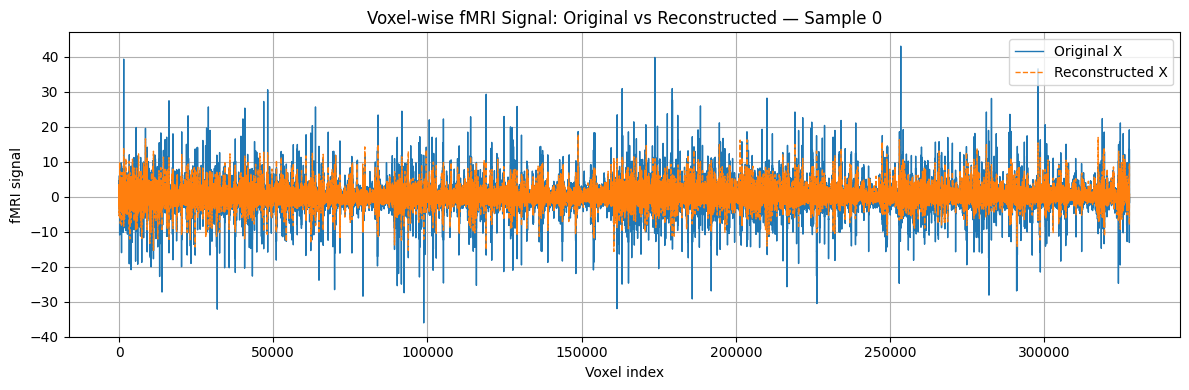

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Safe loading using memory mapping
X = np.load("/mnt/upschrimpf2/scratch/mahdipou/nsd/concatenated_beta_matrix.npy", mmap_mode="r")
X_recon = np.load("X_reconstructed_mlp.npy")

# Choose sample
sample_idx = 0
sample_X = X[sample_idx]
sample_recon = X_recon[sample_idx]

# Compute MSE
mse = mean_squared_error(sample_X, sample_recon)
print(f"MSE between original and reconstructed brain signal (sample {sample_idx}): {mse:.4f}")

# Plot
plt.figure(figsize=(12, 4))
plt.plot(sample_X, label="Original X", linewidth=1)
plt.plot(sample_recon, label="Reconstructed X", linestyle='--', linewidth=1)
plt.title(f"Voxel-wise fMRI Signal: Original vs Reconstructed — Sample {sample_idx}")
plt.xlabel("Voxel index")
plt.ylabel("fMRI signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## t-SNE Projection of fMRI-Based Latent Tokens by Stimulus Identity

In [1]:
import numpy as np

labels = np.load("/mnt/upschrimpf2/scratch/mahdipou/nsd/labels_sessions01to10.npy")
print("Shape:", labels.shape)
print("First 5 entries:", labels[:5])
print("Unique values:", np.unique(labels))


Shape: (7500,)
First 5 entries: [ 626 5013 4850 8823 9538]
Unique values: [    1     3     4 ...  9994  9999 10000]


Selected 30 samples from top-10 repeated image IDs


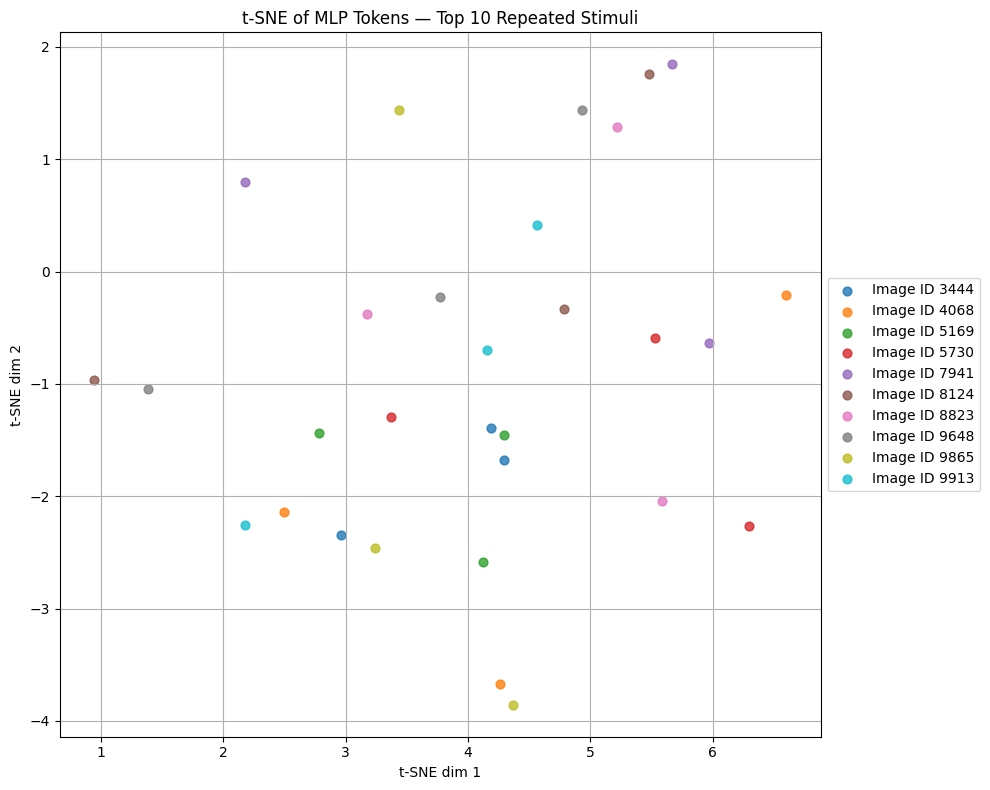

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import Counter

# === Load Data ===
Z = np.load("Z_tokens_mlp.npy")  # shape: (7500, 64)
labels = np.load("/mnt/upschrimpf2/scratch/mahdipou/nsd/labels_sessions01to10.npy")  # shape: (7500,)

# === Find Top-10 Most Frequent Image IDs ===
label_counts = Counter(labels)
top10_ids = [k for k, _ in label_counts.most_common(10)]

# === Filter Only Top-10 Stimuli ===
indices = [i for i, l in enumerate(labels) if l in top10_ids]
Z_top = Z[indices]
labels_top = labels[indices]

print(f"Selected {len(Z_top)} samples from top-10 repeated image IDs")

# === Apply t-SNE ===
tsne = TSNE(n_components=2, perplexity=15, learning_rate='auto', random_state=42)
Z_embedded = tsne.fit_transform(Z_top)

# === Plot ===
plt.figure(figsize=(10, 8))
unique_ids = np.unique(labels_top)
cmap = plt.get_cmap("tab10")  # 10 distinct colors

for i, uid in enumerate(unique_ids):
    mask = labels_top == uid
    plt.scatter(Z_embedded[mask, 0], Z_embedded[mask, 1],
                label=f"Image ID {uid}", s=40, alpha=0.8, color=cmap(i % 10))

plt.title("t-SNE of MLP Tokens — Top 10 Repeated Stimuli")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation Heatmap of Latent Token Dimensions 

In [7]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 12.8 MB/s eta 0:00:00


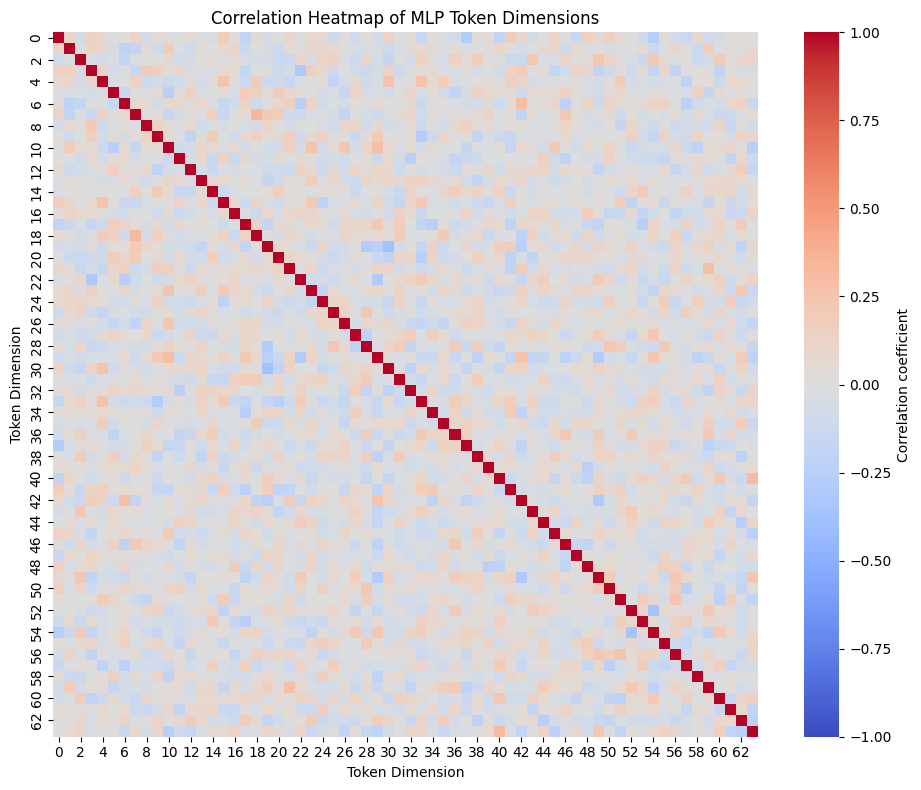

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load tokens
Z = np.load("Z_tokens_mlp.npy")  # shape: (7500, 64)

# Compute correlation matrix
corr_matrix = np.corrcoef(Z, rowvar=False)  # shape: (64, 64)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, square=True,
            cbar_kws={'label': 'Correlation coefficient'})
plt.title("Correlation Heatmap of MLP Token Dimensions")
plt.xlabel("Token Dimension")
plt.ylabel("Token Dimension")
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Load shape info
X = np.load("/mnt/upschrimpf2/scratch/mahdipou/nsd/concatenated_beta_matrix.npy", mmap_mode='r')  # memory-mapped
X_recon = np.load("X_reconstructed_mlp.npy")  # already small (reconstructed)

n_samples = X.shape[0]

# Store incremental mean/variance
mse_list = []
r2_list = []

for i in range(n_samples):
    mse = mean_squared_error(X[i], X_recon[i])
    r2 = r2_score(X[i], X_recon[i])
    mse_list.append(mse)
    r2_list.append(r2)

mse_all = np.array(mse_list)
r2_all = np.array(r2_list)

print("=== MSE ===")
print(f"Mean MSE: {mse_all.mean():.2f}")
print(f"Std MSE:  {mse_all.std():.2f}")

print("\n=== R² ===")
print(f"Mean R²: {r2_all.mean():.4f}")
print(f"Std R²:  {r2_all.std():.4f}")



=== MSE ===
Mean MSE: 1.92
Std MSE:  0.25

=== R² ===
Mean R²: 0.5983
Std R²:  0.0911


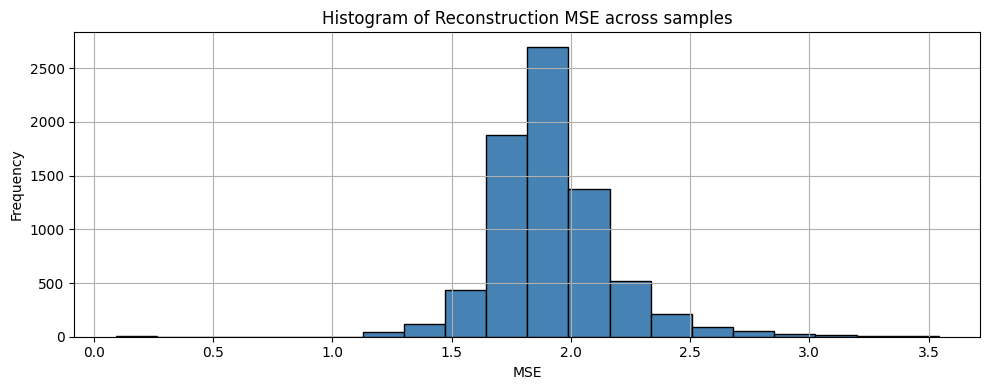

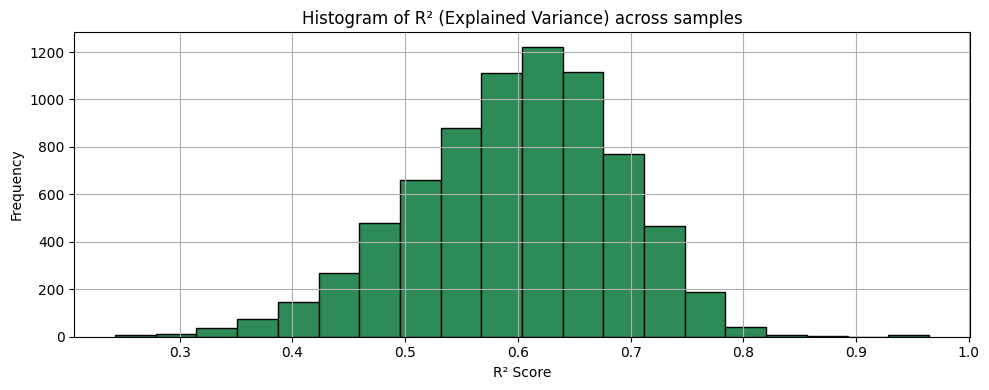

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# --- MSE Histogram ---
plt.figure(figsize=(10, 4))
plt.hist(mse_all, bins=20, color='steelblue', edgecolor='black')
plt.title("Histogram of Reconstruction MSE across samples")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- R² Histogram ---
plt.figure(figsize=(10, 4))
plt.hist(r2_all, bins=20, color='seagreen', edgecolor='black')
plt.title("Histogram of R² (Explained Variance) across samples")
plt.xlabel("R² Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
